**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2020</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 03, 2021 23:59 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "ilaydabeyreli@gmail.com" or "ilayda.beyreli@bilkent.edu.tr".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "pacakge_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) What is one reason not to use the same data for both your training set and your testing set?<br>

  >b) Why is it important for machine learning algorithms to have access to high-quality(large and accurate enough) data ?<br>

  >c) What is the main motivation for using activation functions in artificial neural networks (ANNs)?<br>

  >d) The activations for class A, B and C before softmax were 12, 7 and 4. What would be the softmax values for class A and class B?<br>

  >e) What does it mean to underfit your data model?<br>

  >f) Consider you have a 14 class classification problem. What would be the probability of random guess?<br>




a) The reason is: that one might change the layers or manipuate the weights to get better accuracies for data. But after this the data might be overfitting and will not be suitable for unknown data.

b) High Quality accurate data , will help predict the required class accurately so that it can be efficient also on varied data.

c) Activation functions are important so that model can learn complex patterns in the data.

d) For class A: 12 and for class B = 7

e) Undefitting means that the model doesnt accurately model the trained data, and nor can it model the unknown data.

f) Probability  = 1/14

##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify cats according to their breeds by using simple machine learning algorithms developed for CV problems on cat images.

Your dataset consist of cat images from 13 breeds. Images of each breed is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 1900 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/.....
<br>

Libraries that are required in this question is given in the following code cell.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pandas as pd
import os, os.path
from sklearn.utils import shuffle
import cv2
import time


zf = ZipFile('/content/drive/MyDrive/cs464_hw3.zip','r')
zf.extractall()
zf.close()

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.

Mounted at /content/drive


### Data Loader [8 pts.]

> Indented block



An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "CatsDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of CatsDataset, should be retrieved using the "get_dataset" function. Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to resize the image to 64x64x3 to have consistent input size for all images. Then, you should convert your image to grayscale and flatten it into a vector. Note that the pixel values also needs to be normalized to [0,1] range.
<br>
2. To be compatible with CNN, you need to resize the image to 64x64x3 to have consistent input size for all images. Note that, you **should not** flatten the image or convert it to grayscale in this mode, i.e. all channels of the images should be included and each image should be stored as a matrix.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [2]:
class CatsDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, dataset,labels): # you are free to change parameters
        self.dataset = torch.FloatTensor((dataset).astype('float')).cuda()
        self.labels = torch.FloatTensor(labels.astype('float')).cuda()
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.dataset.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return self.dataset[index,:], self.labels[index]


In [3]:
def convert_d(data):
  text = {}
  def convert(val):
      return text[val]
  # if data.dtype != np.int32 and data.dtype != np.float32:
  contents = data.tolist()
  elements = set(contents)
  x = 0
  for unique in elements:
      if unique not in text:
          text[unique] = x
          x+=1
  data = list(map(convert, data))
  return data 

def get_dataset(root, mode):

  # TODO: 
  # Read dataset files
  # Resize images as 64x64 so that you have consistent data. You can use img.resize((64,64)) from PIL.Image.
  # Construct training, validation and test sets
  # Normalize datasets
  imgss = np.zeros((24523,64,64,3))
  imgss2 = np.zeros((24523,4096))
  h = 0
  if mode == 1:
    labels = []
    root_dir = root
    for f in os.listdir(root_dir):
      for folder in os.listdir(os.path.join(root_dir,f)):
        c =(os.path.join(root_dir,f))
        im = np.array((Image.open(os.path.join(c,folder))))
        im = cv2.resize(im,(64,64))
        if im.ndim == 3:
          im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = im.flatten().reshape(4096,)
        imgss2[h,:] = im/255
        labels.append(f)
        h = h + 1
  else:  
    labels = []
    root_dir = root
    for f in os.listdir(root_dir):
      for folder in os.listdir(os.path.join(root_dir,f)):
        c =(os.path.join(root_dir,f))
        im = np.array((Image.open(os.path.join(c,folder))))
        im = cv2.resize(im,(64,64))
        if im.ndim == 2:
          width, height = im.shape
          out = np.empty((width, height, 3), dtype=np.uint8)
          out[:, :, 0] = im
          out[:, :, 1] = im
          out[:, :, 2] = im
          im = out 
        labels.append(f)
        imgss[h,:,:,:] = im/255
        h = h + 1

  labels = np.array(convert_d(np.array(labels)))
  if mode == 1:
    img = np.array(imgss2)
  else:
    img = np.array(imgss)

  img,labels =  shuffle(img,labels) 

  return (img), (labels)

###Model Implementations [10 pts.]

#### Multi Layer Perceptron [5 pts.]
Now, implement your three layer neural network. (Input+hidden1+hidden2) FNet class will represent your neural network. The first hidden layer will contain 2048 neurons, and the second will have 1024 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [6]:
import torch.nn as nn
import torch.nn.functional
class FNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, inputS, outputS): 
    # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
      super(FNet, self).__init__()
      self.hidden1 = 2048
      self.hidden2 = 1024
      self.input = inputS
      self.outputS = outputS
      self.hidden_layer1 = nn.Linear(self.input, self.hidden1)
      self.hidden_layer2 = nn.Linear(self.hidden1, self.hidden2)
      self.output = nn.Linear(self.hidden2, self.outputS)
    def forward(self, x): 
    # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
      x = F.relu(self.hidden_layer1(x))
      x = F.relu(self.hidden_layer2(x))

      return torch.softmax(self.output(x),dim = 1) # Apply loss function


#### Convolutional Neural Network [5 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 4 layers of convolution: 
<ul>
    <li>(1) 8 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 16 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 32 filters with size of 5 x 5 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
    <li>(9) 32 filters with size of 5 x 5 with stride 1 and padding 1, (10) ReLU and (11) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [5]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
      super(ConvNet, self).__init__()
      self.conv1 = nn.Conv2d(in_channels=3,out_channels=8,stride=1,padding=0,kernel_size=3)
      self.conv2 = nn.Conv2d(in_channels=8,out_channels=16,stride=1,padding=0,kernel_size=3)
      self.conv3 = nn.Conv2d(in_channels=16,out_channels=32,stride=1,padding=0,kernel_size=5)
      self.conv4 = nn.Conv2d(in_channels=32,out_channels=32,stride=1,padding=0,kernel_size=5)
      self.maxpool = nn.MaxPool2d(2)

      self.fc2 = nn.Linear(512,256)
      self.fc = nn.Linear(256,13)

    def forward(self, x): # you 6an add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
      x = F.relu(((self.conv1(x))))
      x = F.relu(self.maxpool(self.conv2(x)))
      x = F.relu(self.maxpool(self.conv3(x)))
      x = F.relu(self.maxpool(self.conv4(x)))
      x = torch.flatten(x,start_dim=1)
      x = self.fc2(x)
      x = self.fc(x)

      return torch.softmax((x),dim = 1) # Apply loss function









































































































###Stochastic Gradient Descent [35 pts.]

####Training with SGD [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. Use SGD as your optimizer. Tune your learning rate, weight decay. Take momentum as $0$ Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_sgd.pth" and "best_cnn_sgd.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

 #########################################################################
 Ans)
I chose the Loss function because, loss function tells how good  model does in terms of predicting expected outcome. Furhter the loss functions reduces the error in prediction. i.e, the lesser the loss the better the model. and will least loss we will also get higher accuracies.

Least loss is used to check the best models for every model.



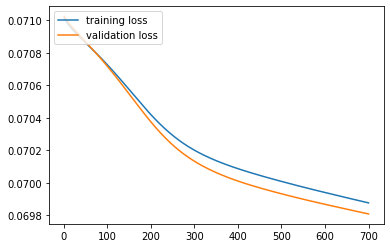

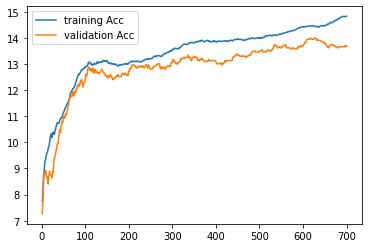

In [7]:
# #@title Default title text
# # HINT: note that your training time should not take many days.


# # TODO:
# # Pick your hyper parameters
max_epoch = 700
train_batch = 50
test_batch = 100
learning_rate = 0.005


use_gpu = torch.cuda.is_available()

imgs2, labels2 = get_dataset("data", 1)
len = np.array(labels2).shape[0]

# Create train dataset loader
train_dataset_MLP = CatsDataset(dataset = imgs2[0:int(len*0.7)],labels =labels2[0:int(len*0.7)])
trainloader_MLP = DataLoader(train_dataset_MLP, batch_size=train_batch)
# Create validation dataset loader
val_dataset_MLP = CatsDataset(dataset = imgs2[int(len*0.7):int(len*0.8)],labels = labels2[int(len*0.7):int(len*0.8)])
valloader_MLP = DataLoader(val_dataset_MLP, batch_size=test_batch)
# Create test dataset loader
test_dataset_MLP = CatsDataset(imgs2[int(len*0.8):],labels2[int(len*0.8):])
test_load_MLP = DataLoader(test_dataset_MLP, batch_size = test_batch )
# initialize your network

model = FNet(4096,13) 
if use_gpu:
  model.cuda()

# define your loss function

criterion = nn.MSELoss()   
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0, weight_decay=1e-04) # you can play with  weight_decay as well
    
len1 = train_dataset_MLP.__len__()
len2 = val_dataset_MLP.__len__()

least_loss = 100
loss_train = np.zeros(max_epoch) 
loss_valid = np.zeros(max_epoch)
acc_train = np.zeros(max_epoch)
acc_validation = np.zeros(max_epoch)


for epoch in range(max_epoch):
    model = model.train()
    j=0
    foo_loss2 = np.zeros((len1,1))
    pred_label= np.zeros((len1,1))
    real_label = np.zeros((len1,1))

    for batch_idx, (data, labels) in enumerate(trainloader_MLP):
        # TODO:
        # Implement training code for a one iteration
        if use_gpu:
          data = data.cuda()
        optimizer.zero_grad()
        y_pred = model(data)
        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)  
        loss  = criterion(y_pred, one_hot.to(torch.float))

        loss.backward()
        optimizer.step()
        predicted = np.array((y_pred).cpu().detach())
        pred_foo = []

        for row in (predicted):
          row = np.array(row)
          pred_foo.append(np.argmax(np.array(row)))  

        actual_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        pred_label[j*train_batch:(j+1)*train_batch,0] = pred_foo[:]
        real_label[j*train_batch:(j+1)*train_batch] = actual_l[:]
        foo_loss2[j*train_batch:(j+1)*train_batch] = np.array(criterion(y_pred, one_hot.to(torch.float)).cpu().detach())
        j=j+1 

    acc = (np.sum(real_label[:] == pred_label[:])*100)/len1
    model = model.eval()

    # Validation Testing
    i=0
    criterions = nn.MSELoss()   
    foo_loss = np.zeros(len2)
    pred_label2 =np.zeros((len2,1))
    real_label_B = np.zeros((len2,1))
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(valloader_MLP):
            # TODO:
            # Implement test code
            y_pred2 = model(data)
            predicted2 = np.array((y_pred2).cpu().detach())
            one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)  
            pred_foo2 = []

            for row in (predicted2):
              row = np.array(row)
              pred_foo2.append(np.argmax(np.array(row)))  

            real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
            pred_label2[i*test_batch:(i+1)*test_batch,0] = np.array(pred_foo2)
            real_label_B[i*test_batch:(i+1)*test_batch] = real_l[:]
            foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2, one_hot.to(torch.float)).cpu().detach())
            i = i + 1

        acc2 = (np.sum(real_label_B[:] == pred_label2[:])*100)/len2
 

    #Trains 
     
    loss_train[epoch] = np.mean(foo_loss2)
    loss_valid[epoch] = np.mean(foo_loss)

    acc_train[epoch] = acc
    acc_validation[epoch] = acc2

    if least_loss > loss_valid[epoch]:
      best_acc = acc2
      least_loss = loss_valid[epoch]
      best_model = model

torch.save(best_model, 'best_mlp_sgd.pth')
    
    
# plot losses vs epoch 

plt.figure()
plt.plot(range(1,max_epoch+1),loss_train , label='training loss')
plt.plot(range(1,max_epoch+1),loss_valid, label = 'validation loss')
plt.legend(loc="upper left")

# plot accuracies vs epoch

plt.figure()
plt.plot(range(1,max_epoch+1),acc_train, label='training Acc')
plt.plot(range(1,max_epoch+1),acc_validation, label = 'validation Acc')
plt.legend(loc="upper left")



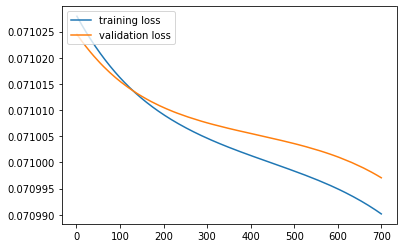

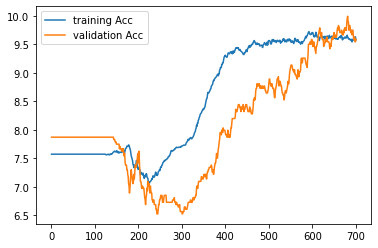

In [8]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 50
test_batch = 100
learning_rate = 0.005


use_gpu = torch.cuda.is_available()

imgs2, labels2 = get_dataset("data", 2)
len = np.array(labels2).shape[0]

# Create train dataset loader
train_dataset_L = CatsDataset(dataset = imgs2[0:int(len*0.7)],labels =labels2[0:int(len*0.7)])
trainloader = DataLoader(train_dataset_L, batch_size=train_batch)

# Create validation dataset loader
val_dataset_L = CatsDataset(dataset = imgs2[int(len*0.7):int(len*0.8)],labels = labels2[int(len*0.7):int(len*0.8)])
valloader = DataLoader(val_dataset_L, batch_size=test_batch)
# Create test dataset loader
test_dataset_L = CatsDataset(imgs2[int(len*0.8):],labels2[int(len*0.8):])
teat_load = DataLoader(test_dataset_L, batch_size=test_batch)

model = ConvNet()
if use_gpu:
  model.cuda()

# # define your loss function
criterion = nn.MSELoss()   
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-04) # you can play with  weight_decay as well

len1 = train_dataset_L.__len__()
len2 = val_dataset_L.__len__()

least_loss = 100
loss_train = np.zeros(max_epoch) 
loss_valid = np.zeros(max_epoch)
acc_train = np.zeros(max_epoch)
acc_validation = np.zeros(max_epoch)

for epoch in range(max_epoch):
    model = model.train()
    j=0
    foo_loss2 = np.zeros((len1,1))
    pred_label= np.zeros((len1,1))
    real_label = np.zeros((len1,1))

    for batch_idx, (data, labels) in enumerate(trainloader):
        # TODO:
        # Implement training code for a one iteration
        if use_gpu:
          data = data.cuda()
        optimizer.zero_grad()
        y_pred = model(data.permute(0,3,1,2))
        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)  
        loss  = criterion(y_pred, one_hot.to(torch.float))
        loss.backward()
        optimizer.step()
        predicted = np.array((y_pred).cpu().detach())
        pred_foo = []

        for row in (predicted):
          row = np.array(row)
          pred_foo.append(np.argmax(np.array(row)))  

        actual_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        pred_label[j*train_batch:(j+1)*train_batch,0] = pred_foo[:]
        real_label[j*train_batch:(j+1)*train_batch] = actual_l[:]
        foo_loss2[j*train_batch:(j+1)*train_batch] = np.array(criterion(y_pred, one_hot.to(torch.float)).cpu().detach())
        j=j+1 

    acc = (np.sum(real_label[:] == pred_label[:])*100)/len1
    model = model.eval()

    # Validation Testing
    i=0
    criterions = nn.MSELoss()   
    foo_loss = np.zeros(len2)
    pred_label2 =np.zeros((len2,1))
    real_label_B = np.zeros((len2,1))
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(valloader):
            # TODO:
            # Implement test code
            y_pred2 = model(data.permute(0,3,1,2))
            predicted2 = np.array((y_pred2).cpu().detach())
            one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)  
            pred_foo2 = []

            for row in (predicted2):
              row = np.array(row)
              pred_foo2.append(np.argmax(np.array(row)))  

            real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
            pred_label2[i*test_batch:(i+1)*test_batch,0] = np.array(pred_foo2)
            real_label_B[i*test_batch:(i+1)*test_batch] = real_l[:]
            foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2, one_hot.to(torch.float)).cpu().detach())
            i = i + 1

        acc2 = (np.sum(real_label_B[:] == pred_label2[:])*100)/len2


    #Trains 
    loss_train[epoch] = np.mean(foo_loss2)
    loss_valid[epoch] = np.mean(foo_loss)
    acc_train[epoch] = acc
    acc_validation[epoch] = acc2

    if least_loss > loss_valid[epoch]:
      least_loss = loss_valid[epoch]
      best_model = model

torch.save(best_model, 'best_cnn_sgd.pth')
    

# plot losses vs epoch 

plt.figure()
plt.plot(range(1,max_epoch+1),loss_train , label='training loss')
plt.plot(range(1,max_epoch+1),loss_valid, label = 'validation loss')
plt.legend(loc="upper left")

# plot accuracies vs epoch

plt.figure()
plt.plot(range(1,max_epoch+1),acc_train, label='training Acc')
plt.plot(range(1,max_epoch+1),acc_validation, label = 'validation Acc')
plt.legend(loc="upper left")


####Test with SGD [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **models**. Which one is more preferable? Why?

Discussion:
For both the models, the accuracies after training with 700 epoch were low, and below expected. The validation loss and Training loss for MLP shows that the model was neither underfitting nor overfitting because there were less discrepancies in the graphs obtained.  
The less accuracies suggests that the paramters were not correctly guessed for the required problem. 

For CNN the algorithm had 4 CONV layers, I used 2 nn.linear layers to reduce the dimensionality of the output to required dimensions. The activation function Softmax reduced the complexity of the model to predict. 

After testing MLP and CNN on test-set, it was determined that MLP performed better in terms of loss and accuracy. Both Mean Accuracy and least loss were better in MLP, further the heatmap also showed that the Model was less biased as the division can be seen on the heat map.



Mean Loss: 0.06994852457699924 
Mean Acc: 14.948153326342771 
Mean Macro Precision: 0.10451884507169132 
Mean Macro Recall: 0.1420994687058846 
Mean Macro F1 Score: 0.09537083011940589


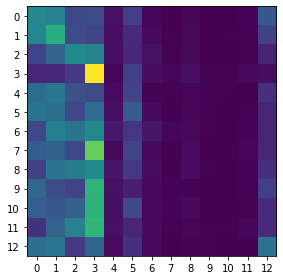

In [21]:
# Test MLP
# load best model
# best_pathur = "/content/drive/My Drive/.../best_mlp_sgd.pth"
best_path = 'best_mlp_sgd.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
criterions = nn.MSELoss()
losses = []

#   iterate over test batches

i=0
criterions = nn.MSELoss()
foo_loss = np.zeros(len2)
pred_label2 = []
real_label_B = []

with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(test_load_MLP):
        # TODO:
        # Implement test code
        y_pred2 = (model(data))
        predicted2 = np.array((y_pred2).cpu().detach())

        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)  
        pred_foo2 = []
        for row in (predicted2):
          row = np.array(row)
          pred_foo2.append(np.argmax(np.array(row)))  
        real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        pred_label2 = pred_label2 + pred_foo2
        real_label_B = real_label_B +  real_l.tolist()
   
        foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2, one_hot.to(torch.float)).cpu().detach())
        i = i + 1

losses =np.mean(foo_loss)
#   get confusion matrix
conf_matrix = confusion_matrix(real_label_B, pred_label2)
#   calculate accuracy
accuracy = accuracy_score(real_label_B, pred_label2)
#   calculate precision
pre = precision_score(real_label_B, pred_label2, average= 'macro')
#   calculate recall
recall = recall_score(real_label_B, pred_label2, average= 'macro')
#   calculate F1 score
f1 = f1_score(real_label_B, pred_label2, average= 'macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Loss: 0.07099634120894101 
Mean Acc: 9.577070954211814 
Mean Macro Precision: 0.026513149374479798 
Mean Macro Recall: 0.09026866881002617 
Mean Macro F1 Score: 0.03254889761833437


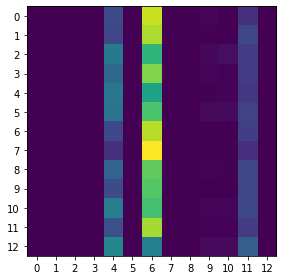

In [9]:
# Test CNN
# load best model
# best_path = "/content/drive/My Drive/.../best_cnn_sgd.pth"

best_path = 'best_cnn_sgd.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
criterions = nn.MSELoss()
losses = []

#   iterate over test batches

i=0
criterions = nn.MSELoss()
foo_loss = np.zeros(len2)
pred_label2 = []
real_label_B = []

with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(teat_load):
        # TODO:
        # Implement test code
        y_pred2 = model(data.permute(0,3,1,2))
        predicted2 = np.array((y_pred2).cpu().detach())
        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13) 

        pred_foo2 = []
        for row in (predicted2):
          row = np.array(row)
          pred_foo2.append(np.argmax(np.array(row)))  
        real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        pred_label2 = pred_label2 + pred_foo2
        real_label_B = real_label_B +  real_l.tolist()
   
        foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2,one_hot.to(torch.float)).cpu().detach())
        i = i + 1

losses =np.mean(foo_loss)
#   get confusion matrix
conf_matrix = confusion_matrix(real_label_B, pred_label2)
#   calculate accuracy
accuracy = accuracy_score(real_label_B, pred_label2)
#   calculate precision
pre = precision_score(real_label_B, pred_label2, average= 'macro')
#   calculate recall
recall = recall_score(real_label_B, pred_label2, average= 'macro')
#   calculate F1 score
f1 = f1_score(real_label_B, pred_label2, average= 'macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()

###Adam Optimizer [35 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_adam.pth" and "best_cnn_adam.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

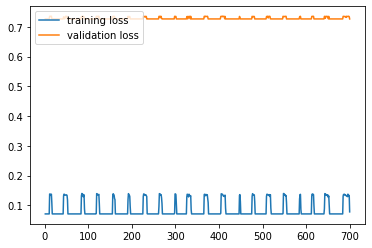

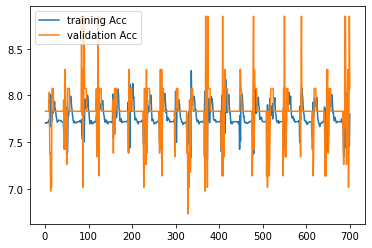

In [10]:
# HINT: note that your training time should not take many days.

# Pick your hyper parameters
max_epoch = 700
train_batch = 32   
test_batch = 64
learning_rate = 0.005



use_gpu = torch.cuda.is_available()

imgs2, labels2 = get_dataset("data", 1)
len = np.array(labels2).shape[0]

# Create train dataset loader
train_dataset_MLP = CatsDataset(dataset = imgs2[0:int(len*0.7)],labels =labels2[0:int(len*0.7)])
trainloader_MLP = DataLoader(train_dataset_MLP, batch_size=train_batch)
# Create validation dataset loader
val_dataset_MLP = CatsDataset(imgs2[int(len*0.7):int(len*0.8)],labels2[int(len*0.7):int(len*0.8)])
valloader_MLP = DataLoader(val_dataset_MLP, batch_size=test_batch)
# Create test dataset loader
test_dataset_MLP = CatsDataset(imgs2[int(len*0.8):],labels2[int(len*0.8):])
test_load_MLP = DataLoader(test_dataset_MLP, batch_size = test_batch )

model = FNet(4096,13) 
if use_gpu:
  model.cuda()

# define your loss function
criterions = nn.BCEWithLogitsLoss ()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-03) # you can play with  weight_decay as well
    
len1 = train_dataset_MLP.__len__()
len2 = val_dataset_MLP.__len__()

least_loss = 100
loss_train = np.zeros(max_epoch) 
loss_valid = np.zeros(max_epoch)
acc_train = np.zeros(max_epoch)
acc_validation = np.zeros(max_epoch)


for epoch in range(max_epoch):
    model = model.train()
    j=0
    foo_loss2 = np.zeros(len1)
    pred_label= np.zeros((len1,1))
    real_label = np.zeros((len1,1))

    for batch_idx, (data, labels) in enumerate(trainloader_MLP):
        # TODO:
        # Implement training code for a one iteration
        if use_gpu:
          data = data.cuda()
        optimizer.zero_grad()
        y_pred = model(data)
        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13) 
        loss  = criterion(y_pred,one_hot.to(torch.float))
        loss.backward()
        optimizer.step()
        predicted = np.array((y_pred).cpu().detach())

        pred_foo = []
        for row in (predicted):
          row = np.array(row)
          pred_foo.append(np.argmax(np.array(row)))  

        actual_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        losses = np.mean(np.array(loss.cpu().detach()))
        pred_label[j*train_batch:(j+1)*train_batch,0] = pred_foo
        real_label[j*train_batch:(j+1)*train_batch] = actual_l[:]
        foo_loss2[j*train_batch:(j+1)*train_batch] = np.array(criterion(y_pred, one_hot.to(torch.float)).cpu().detach())
        j=j+1 

    acc = (np.sum(real_label[:] == pred_label[:])*100)/len1
    model = model.eval()

    # Validation Testing
    i=0
    criterions = nn.BCEWithLogitsLoss ()    
    foo_loss = np.zeros(len2)
    pred_label2 =np.zeros((len2,1))
    real_label_B = np.zeros((len2,1))

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(valloader_MLP):
            # TODO:
            # Implement test code
            y_pred2 = model(data)
            predicted2 = np.array((y_pred2).cpu().detach())
            one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)  
            pred_foo2 = []

            for row in (predicted2):
              row = np.array(row)
              pred_foo2.append(np.argmax(np.array(row)))  

            real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
            pred_label2[i*test_batch:(i+1)*test_batch,0] = np.array(pred_foo2)
            real_label_B[i*test_batch:(i+1)*test_batch] = real_l[:]
            foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2, one_hot.to(torch.float)).cpu().detach())
            i = i + 1

        acc2 = (np.sum(real_label_B[:] == pred_label2[:])*100)/len2

    #Trains 
     
    loss_train[epoch] = np.mean(foo_loss2)
    loss_valid[epoch] = np.mean(foo_loss)
    acc_train[epoch] = acc
    acc_validation[epoch] = acc2

    if least_loss > loss_valid[epoch]:
      best_acc = acc2
      least_loss = loss_valid[epoch]
      best_model = model

torch.save(best_model, 'best_mlp_adam.pth')
    
    
# plot losses vs epoch 


plt.figure()
plt.plot(range(1,max_epoch+1),loss_train , label='training loss')
plt.plot(range(1,max_epoch+1),loss_valid, label = 'validation loss')
plt.legend(loc="upper left")

# plot accuracies vs epoch

plt.figure()
plt.plot(range(1,max_epoch+1),acc_train, label='training Acc')
plt.plot(range(1,max_epoch+1),acc_validation, label = 'validation Acc')
plt.legend(loc="upper left")


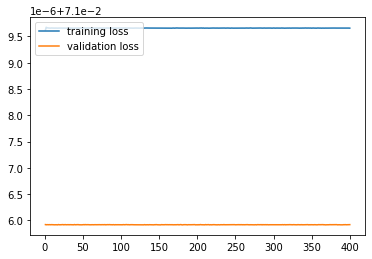

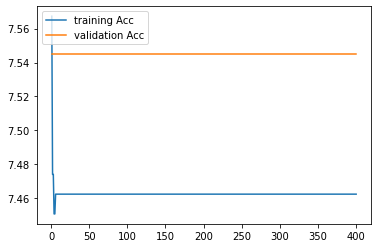

In [ ]:
# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 64
learning_rate = 0.009

use_gpu = torch.cuda.is_available()

imgs2, labels2 = get_dataset("data", 2)
len = np.array(labels2).shape[0]

# Create train dataset loader
train_dataset_L = CatsDataset(dataset = imgs2[0:int(len*0.7)],labels =labels2[0:int(len*0.7)])
trainloader = DataLoader(train_dataset_L, batch_size=train_batch)

# Create validation dataset loader
val_dataset_L = CatsDataset(imgs2[int(len*0.7):int(len*0.8)],labels2[int(len*0.7):int(len*0.8)])
valloader = DataLoader(val_dataset_L, batch_size=test_batch)
# Create test dataset loader
test_dataset_L = CatsDataset(imgs2[int(len*0.8):],labels2[int(len*0.8):])
teat_load = DataLoader(test_dataset_L, batch_size=test_batch)

model = ConvNet()
if use_gpu:
  model.cuda()

# # define your loss function
criterion = nn.MSELoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-03) # you can play with  weight_decay as well

len1 = train_dataset_L.__len__()
len2 = val_dataset_L.__len__()

least_loss = 100
loss_train = np.zeros(max_epoch) 
loss_valid = np.zeros(max_epoch)
acc_train = np.zeros(max_epoch)
acc_validation = np.zeros(max_epoch)



for epoch in range(max_epoch):
    model = model.train()
    j=0
    foo_loss2 = np.zeros(len1)
    pred_label= np.zeros((len1,1))
    real_label = np.zeros((len1,1))

    for batch_idx, (data, labels) in enumerate(trainloader):
        # TODO:
        # Implement training code for a one iteration
        if use_gpu:
          data = data.cuda()
        optimizer.zero_grad()
        y_pred = model(data.permute(0,3,1,2))
        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13) 
        loss  = criterion(y_pred,one_hot.to(torch.float))
        loss.backward()
        optimizer.step()
        predicted = np.array((y_pred).cpu().detach())
        pred_foo = []

        for row in (predicted):
          row = np.array(row)
          pred_foo.append(np.argmax(np.array(row)))  

        actual_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        losses = np.mean(np.array(loss.cpu().detach()))
        pred_label[j*train_batch:(j+1)*train_batch,0] = pred_foo
        real_label[j*train_batch:(j+1)*train_batch] = actual_l[:]
        foo_loss2[j*train_batch:(j+1)*train_batch] = np.array(criterion(y_pred,one_hot.to(torch.float)).cpu().detach())
        j=j+1 

    acc = (np.sum(real_label[:,0]==pred_label[:,0])*100)/len1
    model = model.eval()
    acc2 = []
    # Validation Testing
    i=0
    criterions = nn.MSELoss()
    foo_loss = np.zeros(len2)
    pred_label2 =np.zeros((len2,1))
    real_label_B = np.zeros((len2,1))

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(valloader):
            # TODO:
            # Implement test code
            y_pred2 = model(data.permute(0,3,1,2))
            predicted2 = np.array((y_pred2).cpu().detach())
            one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)  
            pred_foo2 = []

            for row in (predicted2):
              row = np.array(row)
              pred_foo2.append(np.argmax(np.array(row)))  

            real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
            pred_label2[i*test_batch:(i+1)*test_batch,0] = np.array(pred_foo2)
            real_label_B[i*test_batch:(i+1)*test_batch] = real_l[:]
            foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2, one_hot.to(torch.float)).cpu().detach())
            i = i + 1

        acc2 = (np.sum(real_label_B[:] == pred_label2[:])*100)/len2
    #Trains 
     
    loss_train[epoch] = np.mean(foo_loss2)
    loss_valid[epoch] = np.mean(foo_loss)
    acc_train[epoch] = acc
    acc_validation[epoch] = acc2

    if least_loss > loss_valid[epoch]:
      best_acc = acc2
      least_loss = loss_valid[epoch]
      best_model = model

torch.save(best_model, 'best_cnn_adam.pth')
    
# plot losses vs epoch 


plt.figure()
plt.plot(range(1,max_epoch+1),loss_train , label='training loss')
plt.plot(range(1,max_epoch+1),loss_valid, label = 'validation loss')
plt.legend(loc="upper left")

# plot accuracies vs epoch

plt.figure()
plt.plot(range(1,max_epoch+1),acc_train, label='training Acc')
plt.plot(range(1,max_epoch+1),acc_validation, label = 'validation Acc')
plt.legend(loc="upper left")


####Test with ADAM [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Discussion:
In this part instead of the SGD optimizer, ADAM was used, after experimenting with the parameters I decided, the parameters ADAM_MLP and ADAM_CNN. The loss function most that seems to be most compatible with ADAM optimizer, was known to be 'nn.BCEWithLogitsLoss'. I used this loss function for ADAM_MLP, similar to the previous SGD, the max accuracies were similar and noticable changes were not abserved. However it was noticed that there was varying fluctuation, on the graphs abtained for ADAM_MLP. This suggests that, the weight decay, was not upto the mark, the training and validation loss of ADAM for both models show, serious underfitting. 
To overcome this a penalty factor was added by increasing the weight decay, so the more normalized model canbe obtained.


The heat graph for CNN_ADAM shows the biasness of the model, for the class 3 and 4. This biasness can be a cause of inaccurate shuffling or, data mismanagement.


Mean Loss: 0.07100664261503671 
Mean Acc: 7.800302924385413 
Mean Macro Precision: 0.00561436524739277 
Mean Macro Recall: 0.07692307692307693 
Mean Macro F1 Score: 0.010464929332495359


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


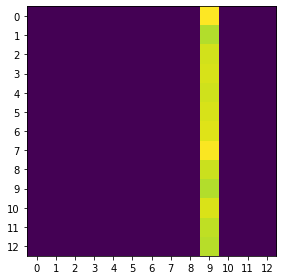

In [11]:
# Test MLP
# load best model
# best_path = "/content/drive/My Drive/.../best_mlp_adam.pth"

best_path = 'best_mlp_adam.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
criterions = nn.MSELoss()
losses = []

#   iterate over test batches

i=0
criterions = nn.MSELoss()
foo_loss = np.zeros(len2)
pred_label2 = []
real_label_B = []

with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(test_load_MLP):
        # TODO:
        # Implement test code
        y_pred2 = (model(data))
        predicted2 = np.array((y_pred2).cpu().detach())
        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13) 

        pred_foo2 = []
        for row in (predicted2):
          row = np.array(row)
          pred_foo2.append(np.argmax(np.array(row)))  
        real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        pred_label2 = pred_label2 + pred_foo2
        real_label_B = real_label_B +  real_l.tolist()
   
        foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2 , one_hot.to(torch.float)).cpu().detach())
        i = i + 1

losses =np.mean(foo_loss)
#   get confusion matrix
conf_matrix = confusion_matrix(real_label_B, pred_label2)
#   calculate accuracy
accuracy = accuracy_score(real_label_B, pred_label2)
#   calculate precision
pre = precision_score(real_label_B, pred_label2, average= 'macro')
#   calculate recall
recall = recall_score(real_label_B, pred_label2, average= 'macro')
#   calculate F1 score
f1 = f1_score(real_label_B, pred_label2, average= 'macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Loss: 0.07107435836537239 
Mean Acc: 7.771175579634161 
Mean Macro Precision: 0.006084842782090488 
Mean Macro Recall: 0.07692307692307693 
Mean Macro F1 Score: 0.011277594500719383


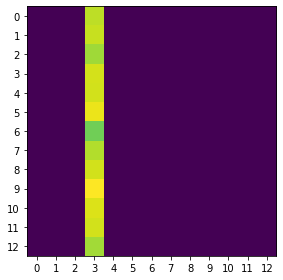

In [23]:
# Test CNN
best_path = 'best_cnn_adam.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
criterions = nn.MSELoss()
losses = []

#   iterate over test batches

i=0
criterions = nn.MSELoss()
foo_loss = np.zeros(len2)
pred_label2 = []
real_label_B = []

with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(teat_load):
        # TODO:
        # Implement test code
        y_pred2 = model(data.permute(0,3,1,2))
        predicted2 = np.array((y_pred2).cpu().detach())
        one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13) 

        pred_foo2 = []
        for row in (predicted2):
          row = np.array(row)
          pred_foo2.append(np.argmax(np.array(row)))  

        real_l = np.array(labels[:].unsqueeze(1).cpu().detach())
        pred_label2 = pred_label2 + pred_foo2
        real_label_B = real_label_B +  real_l.tolist()
   
        foo_loss[i*test_batch:(i+1)*test_batch] = np.array(criterions(y_pred2 , one_hot.to(torch.float)).cpu().detach())
        i = i + 1

losses =np.mean(foo_loss)
#   get confusion matrix
conf_matrix = confusion_matrix(real_label_B, pred_label2)
#   calculate accuracy
accuracy = accuracy_score(real_label_B, pred_label2)
#   calculate precision
pre = precision_score(real_label_B, pred_label2, average= 'macro')
#   calculate recall
recall = recall_score(real_label_B, pred_label2, average= 'macro')
#   calculate F1 score
f1 = f1_score(real_label_B, pred_label2, average= 'macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

fig.tight_layout()
plt.show()